# Estadísticas Móviles 
## Grado en Ingeniería Informática. Universidad de Burgos
**Autor:** Alicia Olivares Gil

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib.pyplot como plot

### Leer ficheros csv:

In [2]:
import loadData as ld

path =r'../data/'

datos = ld.load(path)
datos = ld.preprocess(datos)

#añadir target
datos = ld.newSeizure(datos, '2018-11-10 3:30:00', 60*20)

print(len(datos))
datos.head()

4722740


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
3949519,2018-10-30 21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False
3949520,2018-10-30 21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
3949521,2018-10-30 21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949522,2018-10-30 21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False
3949524,2018-10-30 21:20:25,4.0,25.0,28.0,23.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False


### Eliminar negativos y ruido 

In [3]:
for d in datos: 
    if datos[d].dtype == np.float64: 
        datos.loc[datos[d]<5.0, d]=0.0
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
3949519,2018-10-30 21:20:23,0.0,27.0,29.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949520,2018-10-30 21:20:23,0.0,26.0,28.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949521,2018-10-30 21:20:23,0.0,25.0,27.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949522,2018-10-30 21:20:24,0.0,26.0,28.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949524,2018-10-30 21:20:25,0.0,25.0,28.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


### Normalizar 

In [5]:
presionesNorm = ld.normalize(datos.iloc[:,1:13])
datos = pd.concat([datos['DateTime'],presionesNorm*100,datos['target']], axis=1)
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
3949519,2018-10-30 21:20:23,0.0,27.835052,30.208333,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949520,2018-10-30 21:20:23,0.0,26.804124,29.166667,21.782178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949521,2018-10-30 21:20:23,0.0,25.773196,28.125000,21.782178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949522,2018-10-30 21:20:24,0.0,26.804124,29.166667,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949524,2018-10-30 21:20:25,0.0,25.773196,29.166667,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


### Estadisticas móviles: 
- #### Media móvil: 

In [6]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=5,
    min=1,
    max=30,
    description='ventana:',
    readout=True,
    readout_format='d'
)
display(slider)

IntSlider(value=5, description='ventana:', max=30, min=1)

In [7]:
ventanaMedia = slider.value

datosEstadisticos = datos.copy()
for i in range(1,13):
    nombre_col = 'P'+str(i)
    nombre_col_mean = nombre_col+' mean'
    datosEstadisticos[nombre_col_mean] = datosEstadisticos[nombre_col].rolling(ventanaMedia).mean()

datosEstadisticos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,P9 mean,P10 mean,P11 mean,P12 mean
3949519,2018-10-30 21:20:23,0.0,27.835052,30.208333,22.772277,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949520,2018-10-30 21:20:23,0.0,26.804124,29.166667,21.782178,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949521,2018-10-30 21:20:23,0.0,25.773196,28.125000,21.782178,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949522,2018-10-30 21:20:24,0.0,26.804124,29.166667,22.772277,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949524,2018-10-30 21:20:25,0.0,25.773196,29.166667,22.772277,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- #### Desviación móvil:  

In [8]:
ventanaDesviacion = ventanaMedia

for i in range(1,13):
    nombre_col = 'P'+str(i)
    nombre_col_std = nombre_col+' std'
    datosEstadisticos[nombre_col_std] = datosEstadisticos[nombre_col].rolling(ventanaDesviacion).std()

datosEstadisticos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
3949519,2018-10-30 21:20:23,0.0,27.835052,30.208333,22.772277,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949520,2018-10-30 21:20:23,0.0,26.804124,29.166667,21.782178,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949521,2018-10-30 21:20:23,0.0,25.773196,28.125000,21.782178,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949522,2018-10-30 21:20:24,0.0,26.804124,29.166667,22.772277,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949524,2018-10-30 21:20:25,0.0,25.773196,29.166667,22.772277,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Eliminar filas sin datos estadisticos: 

In [9]:
datosEstadisticos = datosEstadisticos.dropna()
print(len(datosEstadisticos))
datosEstadisticos.head()

4722716


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
3949544,2018-10-30 21:20:41,0.0,24.742268,29.166667,22.772277,0.0,0.0,0.0,0.0,0.0,...,1.377995,1.400211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949543,2018-10-30 21:20:41,0.0,23.711340,28.125000,21.782178,0.0,0.0,0.0,0.0,0.0,...,1.401419,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949545,2018-10-30 21:20:42,0.0,23.711340,28.125000,21.782178,0.0,0.0,0.0,0.0,0.0,...,1.426995,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949546,2018-10-30 21:20:43,0.0,23.711340,28.125000,22.772277,0.0,0.0,0.0,0.0,0.0,...,1.426995,1.400211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949547,2018-10-30 21:20:44,0.0,22.680412,28.125000,21.782178,0.0,0.0,0.0,0.0,0.0,...,1.450874,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Representar datos: 

In [10]:
lw=0.5 #grosor de línea 

date_time = np.transpose(datos['DateTime'])
date_time_mean = np.transpose(datosEstadisticos['DateTime'])

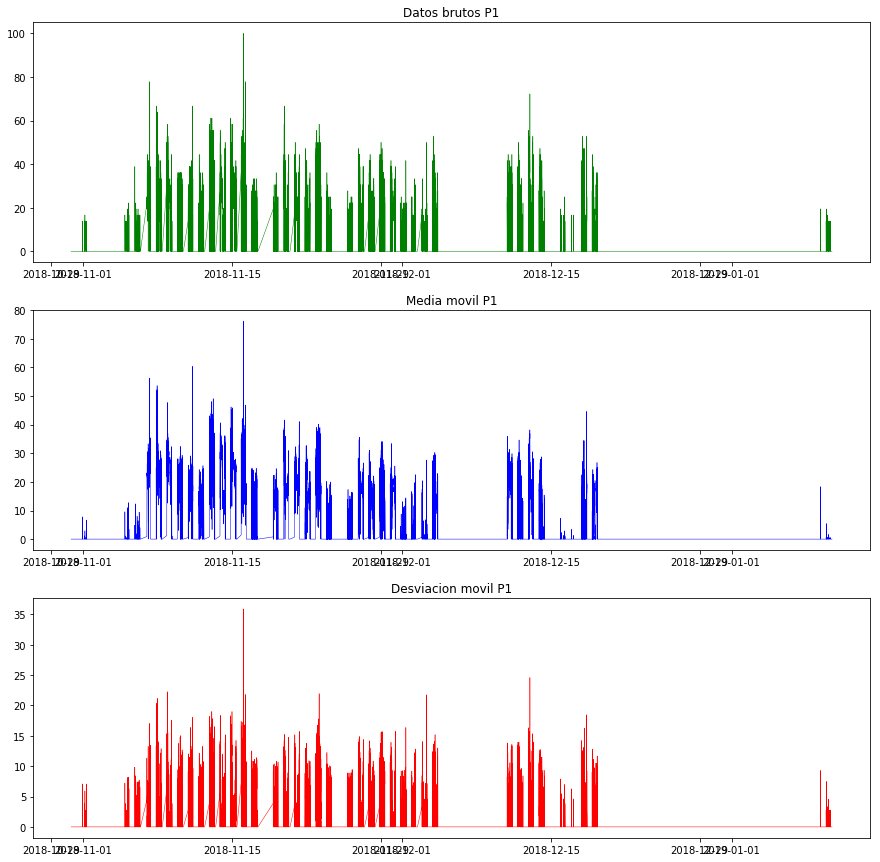

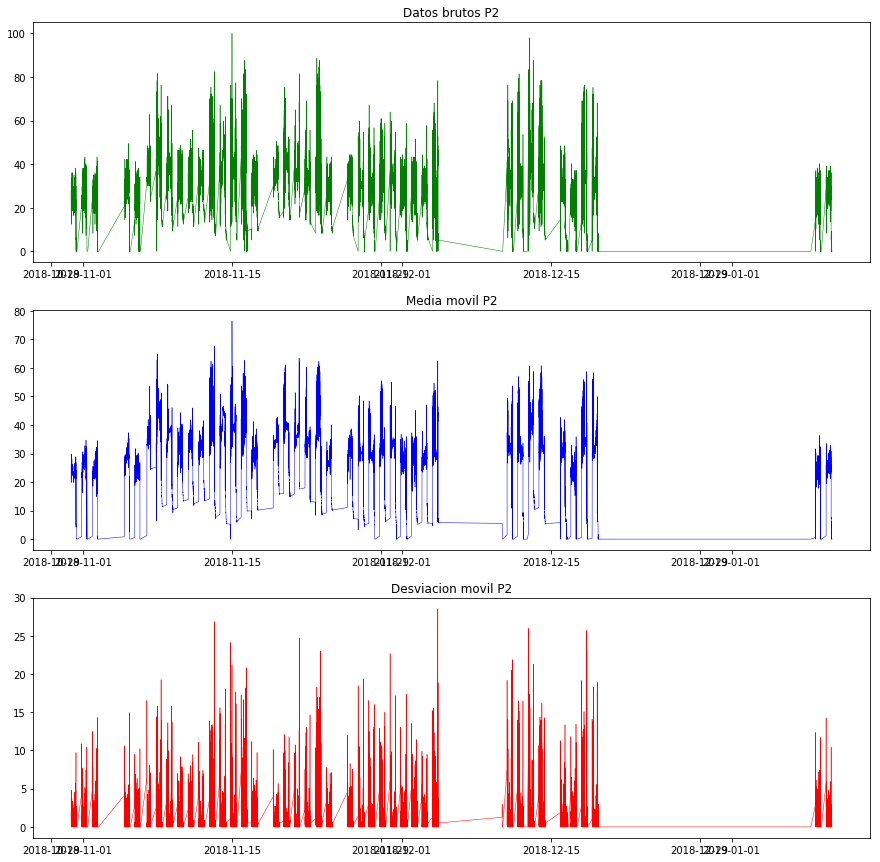

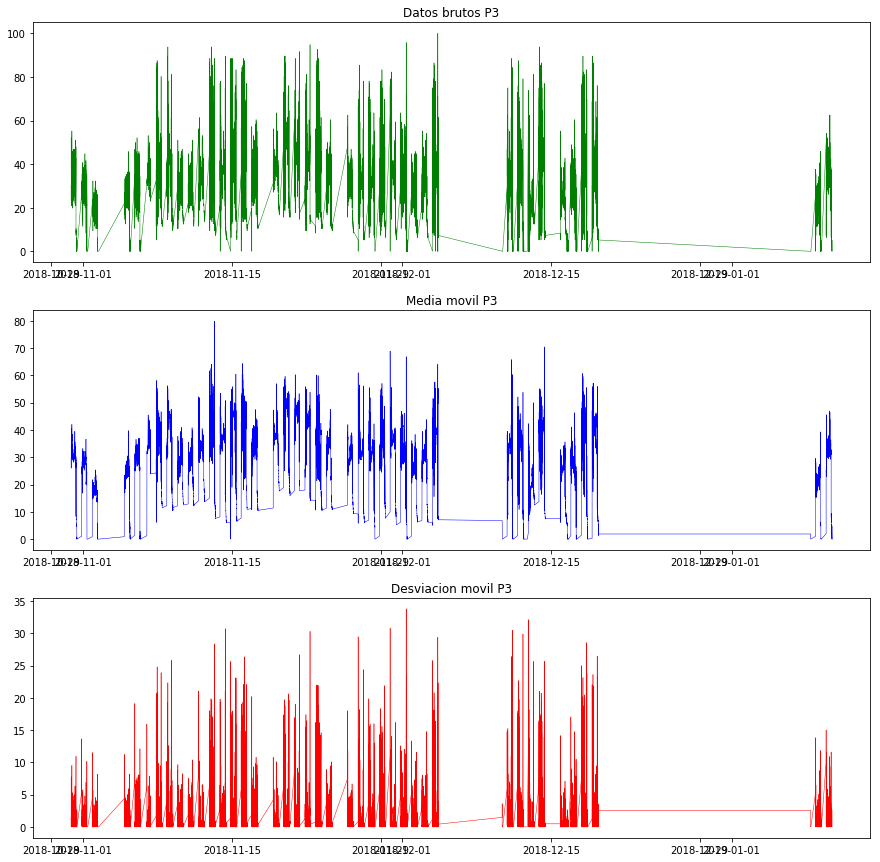

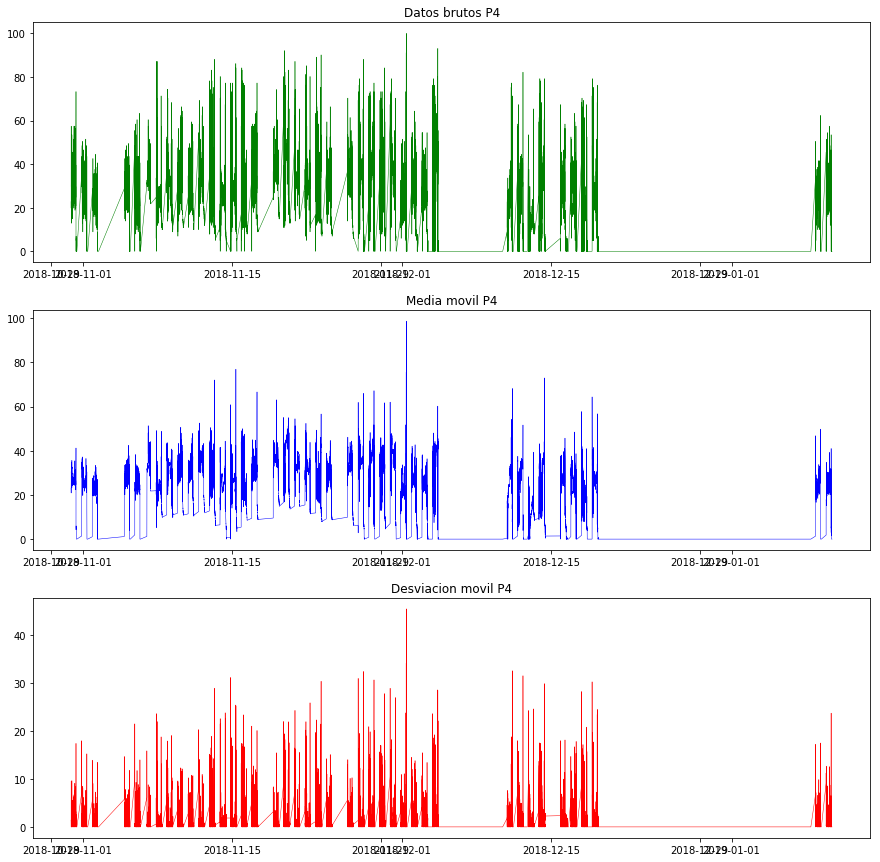

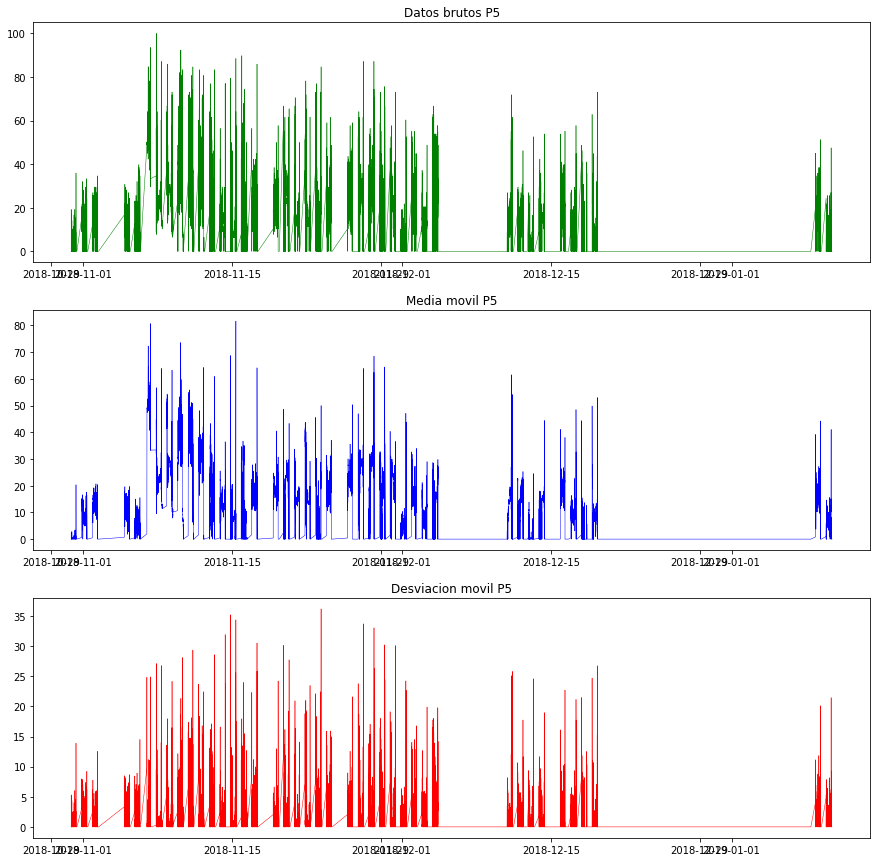

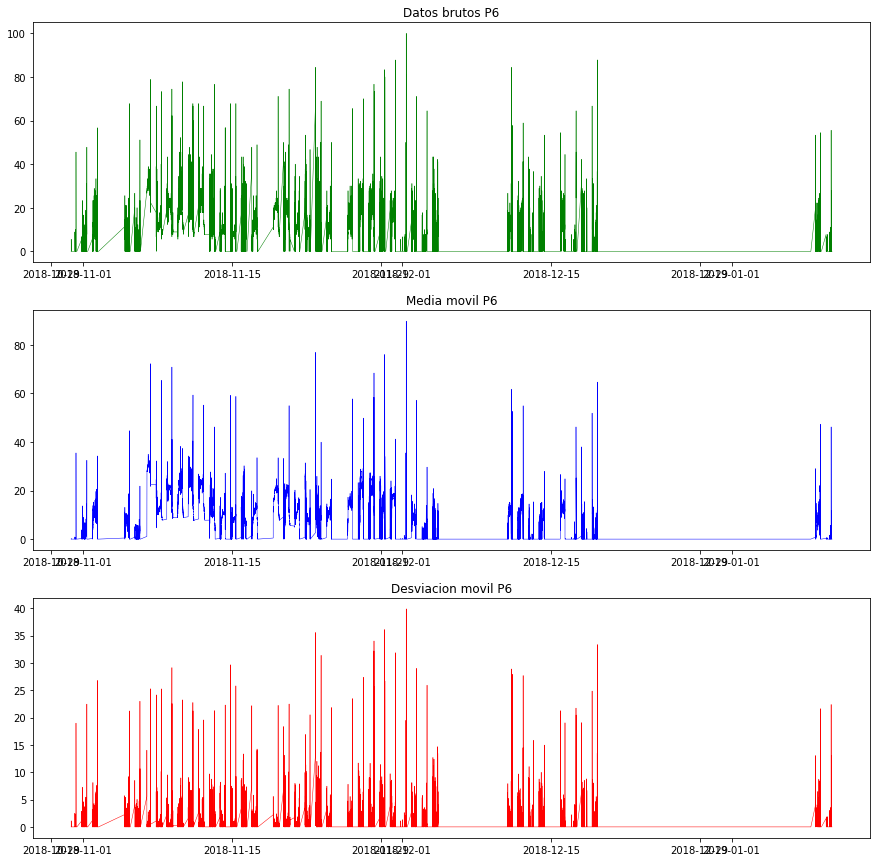

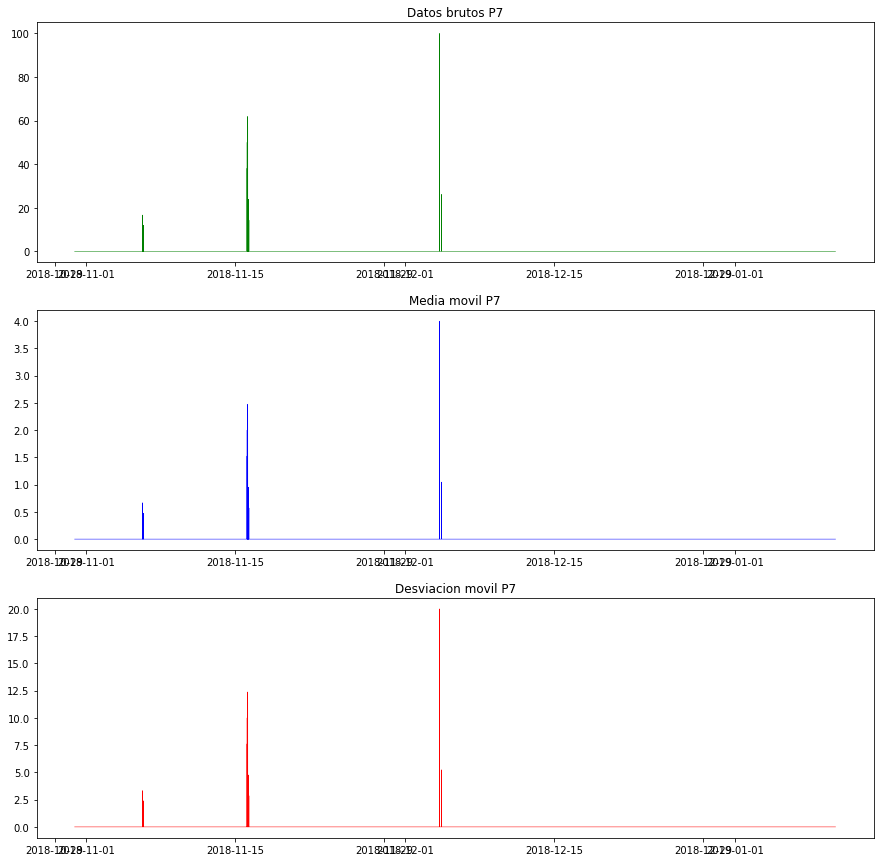

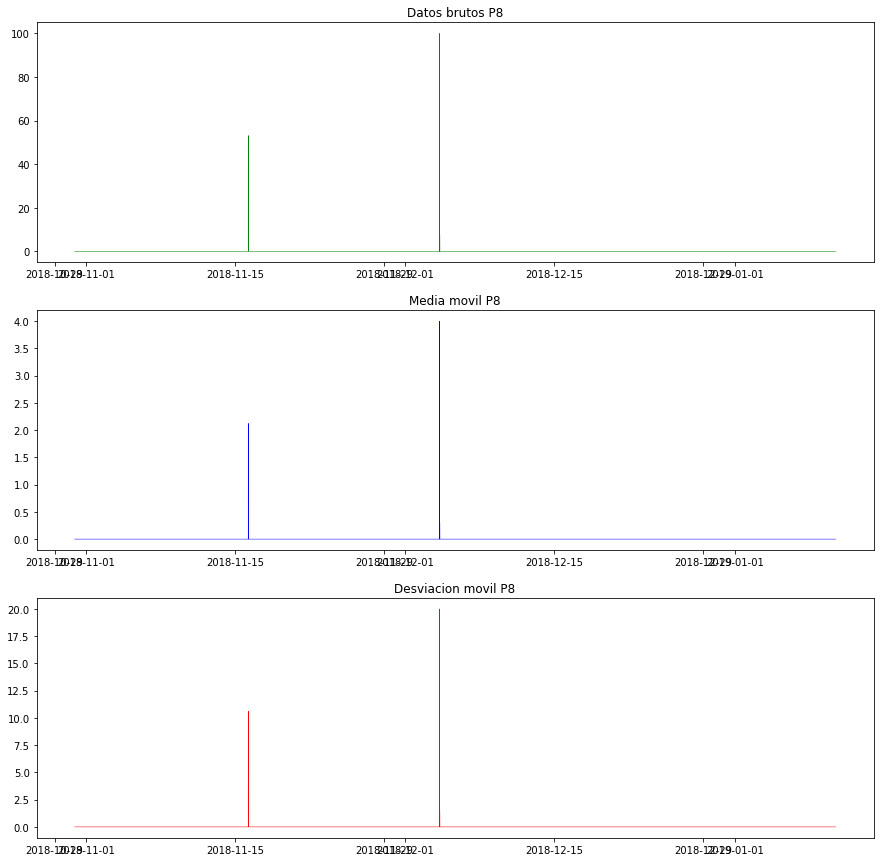

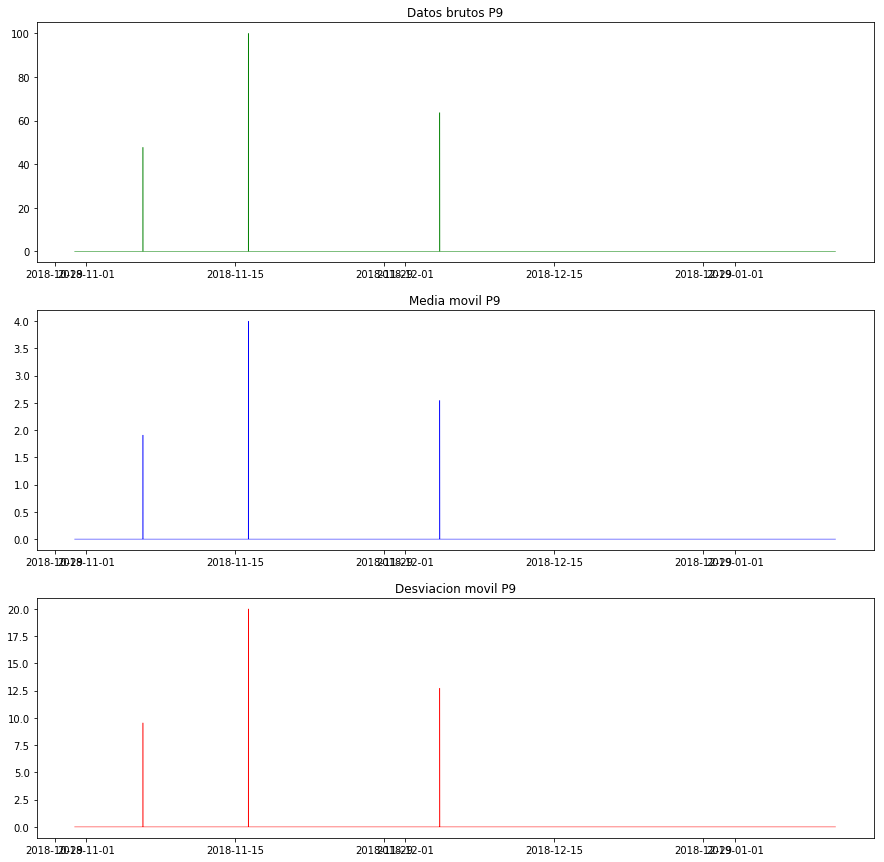

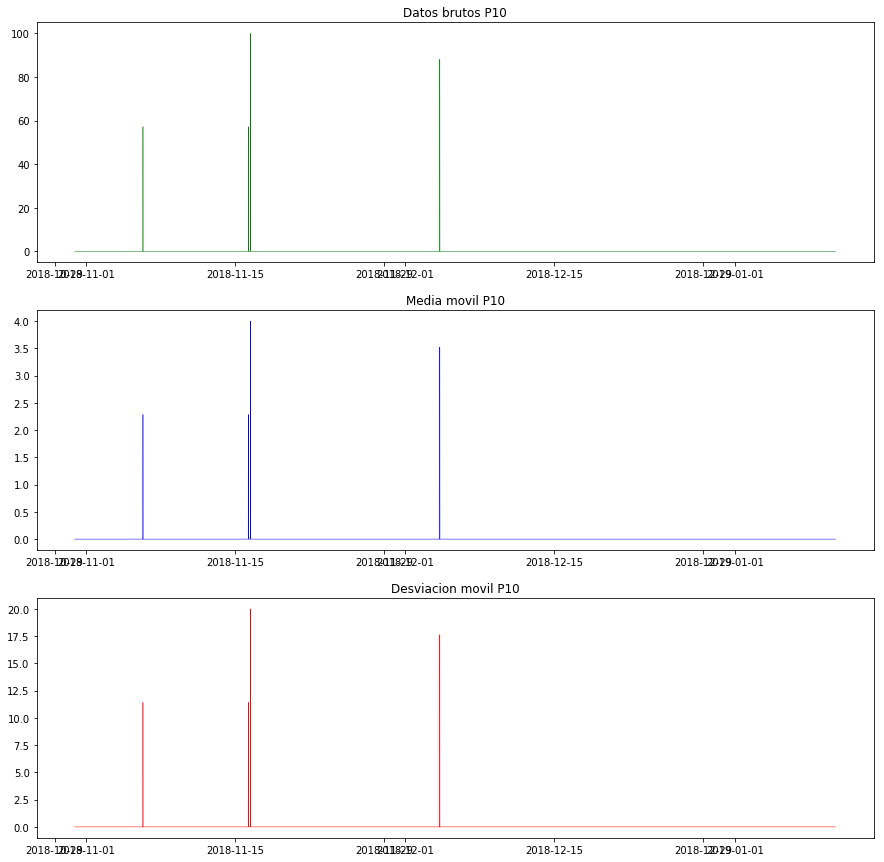

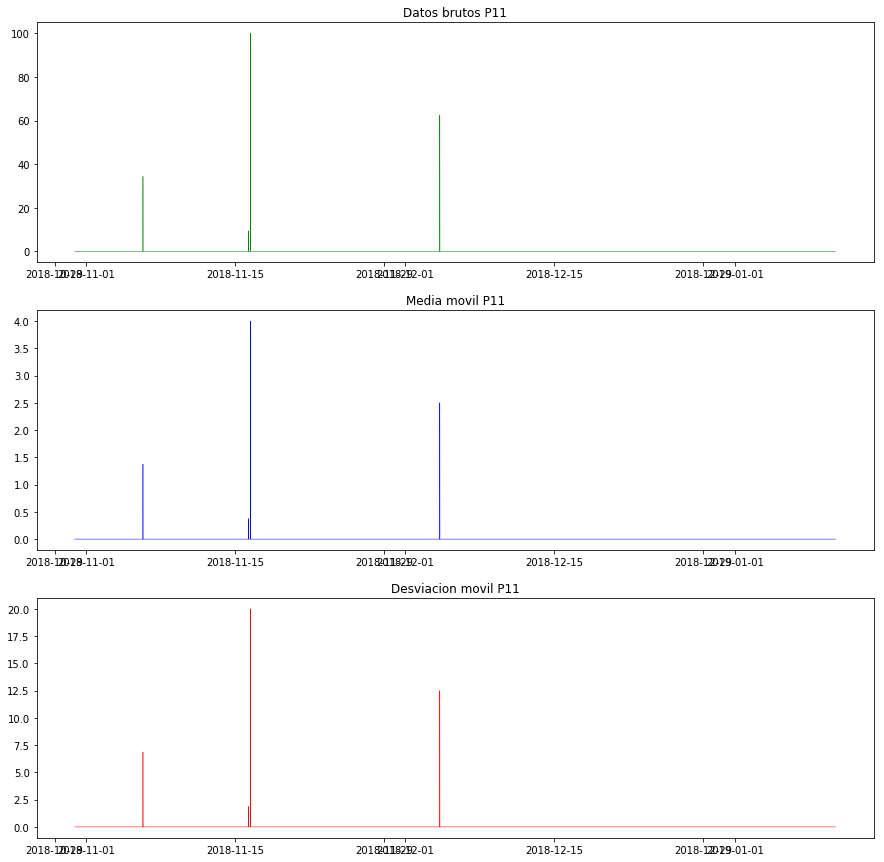

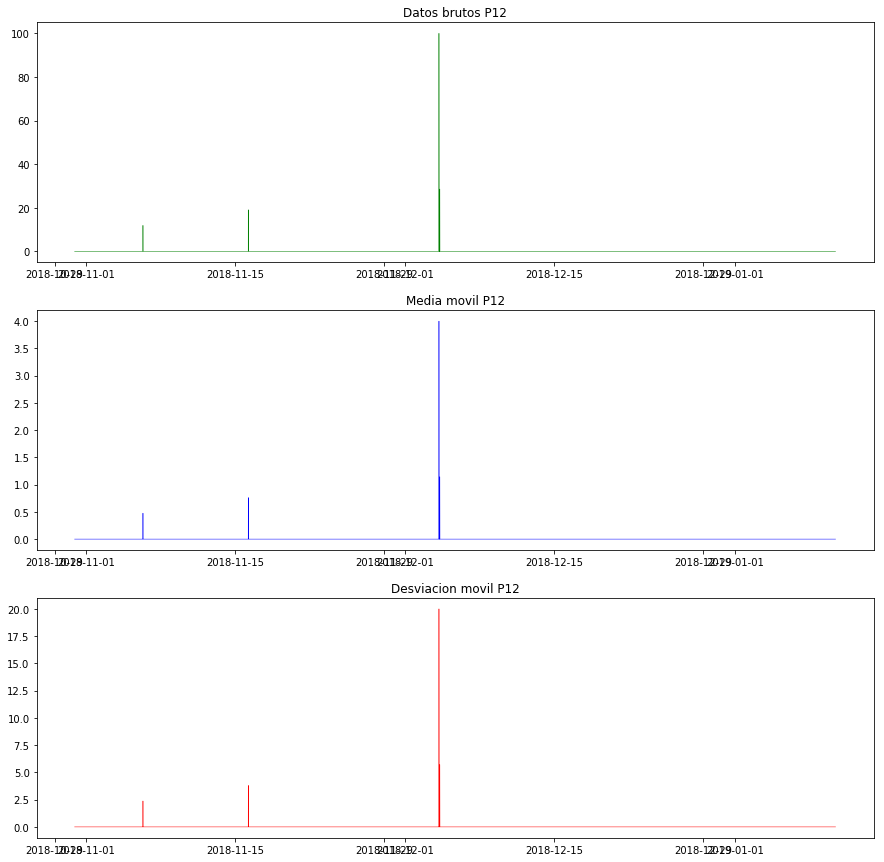

In [10]:
for i in range(1,13):  
    nombre_col = 'P'+str(i)
    nombre_col_mean = nombre_col+' mean'
    nombre_col_std = nombre_col+' std'
    dato = np.transpose(datos[nombre_col])
    dato_mean = np.transpose(datosEstadisticos[nombre_col_mean])
    dato_std = np.transpose(datosEstadisticos[nombre_col_std])

    plt.figure(figsize=(15,15))
    plt.subplot(311)
    plt.plot(date_time, dato, linewidth=lw, c='g')
    plt.title("Datos brutos "+nombre_col)
    plt.subplot(312)
    plt.plot(date_time_mean, dato_mean, linewidth=lw, c='b')
    plt.title("Media movil "+nombre_col)
    plt.subplot(313)
    plt.plot(date_time_mean, dato_std, linewidth=lw, c='r')
    plt.title("Desviacion movil "+nombre_col)

In [11]:
datosEstadisticos = pd.concat([datos.iloc[:,0],datosEstadisticos.iloc[:,13:]], axis = 1, sort=False)
datosEstadisticos = datosEstadisticos.dropna()
datosEstadisticos.head()

,DateTime,target,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
0,2018-12-13 21:10:55,False,0.0,11.463918,14.416667,10.059406,0.512821,0.0,0.0,0.0,...,9.583333,6.578014,2.564103,0.000006,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-12-13 21:10:55,False,0.0,12.329897,15.708333,10.772277,0.871795,0.0,0.0,0.0,...,11.331048,7.366762,3.068007,0.000006,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-13 21:10:55,False,0.0,13.113402,16.916667,11.445545,1.230769,0.0,0.0,0.0,...,12.522694,7.936659,3.461538,0.000006,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-12-13 21:10:55,False,0.0,13.938144,18.166667,12.158416,1.589744,0.0,0.0,0.0,...,13.578609,8.394070,3.779334,0.000006,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-12-13 21:10:56,False,0.0,14.721649,19.375000,12.831683,2.000000,0.0,0.0,0.0,...,14.374119,8.788488,4.139127,0.000006,0.0,0.0,0.0,0.0,0.0,0.0


## Exportar datos

In [12]:
import pickle as pk

In [13]:
with open('datos.pdd','wb') as f:
    pk.dump(datos,f)
    
with open('datosEstadisticos.pdd','wb') as f:
    pk.dump(datosEstadisticos,f)